In [10]:
import os
os.environ['ZFIT_DISABLE_TF_WARNINGS'] = '1'
# numpy is used for generating, storing, and plotting data
import numpy as np

import uproot

# in order to visualise the results of the computation, we use matplotlib
import matplotlib as mpl

import matplotlib.pyplot as plt
import mplhep
plt.style.use(mplhep.style.LHCb2)
plt.rcParams['text.usetex'] = True
# for histograms boost has an easy api and is very fast
import hist
# for statistical distributions we can use a lot from scipy
from scipy import stats

## File import, data processing
 

In [11]:
path = './job25-CombDVntuple-test.root'
path = './job29-CombDVntuple-full-evts.root'
file = uproot.open(path)
print(file.keys())

#xicc_turbo = file['Xicc_TURBO/DecayTree']
#xicc_rec = file['Xicc_REC/DecayTree']
#lc_turbo = file['Lambdac_TURBO/DecayTree']

xicc_mc = file['MCTree/MCDecayTree']
xicc_rec = file['tuple_sel_rec/DecayTree']



['tuple_sel_Lc;1', 'tuple_sel_Lc/DecayTree;1', 'tuple_sel_rec;1', 'tuple_sel_rec/DecayTree;1', 'MCTree;1', 'MCTree/MCDecayTree;1', 'tuple_sel_Xicc;1', 'tuple_sel_Xicc/DecayTree;1']


In [12]:
#['Xicc_M']

In [13]:
#branches_we_want = ["Xicc_M","Lc_M","BDT","BDT4","BDTG","MLP"] 
#data_mc = xicc_mc.arrays(expressions = branches_we_want, library='pd')

branches_we_want = ["Xicc_M","Lc_M","Xicc_TRUEID", "Lc_TRUEID","XiccK_TRUEID","XiccPi1_TRUEID","XiccPi2_TRUEID", "LcP_TRUEID", "LcK_TRUEID", "LcPi_TRUEID", "XiccK_MC_MOTHER_ID", "XiccPi1_MC_MOTHER_ID", "XiccPi2_MC_MOTHER_ID", "LcPi_MC_MOTHER_ID", "LcPi_MC_GD_MOTHER_ID", "LcP_MC_MOTHER_ID", "LcP_MC_GD_MOTHER_ID", "LcK_MC_MOTHER_ID", "LcK_MC_GD_MOTHER_ID"] 
data_rec = xicc_rec.arrays(expressions = branches_we_want, library='pd')


In [14]:
file.close()

## Xicc Turbo plot

In [21]:
cut = "(abs(Lc_TRUEID)==4122)&(abs(LcP_TRUEID)==2212)&(abs(LcK_TRUEID)==321)&(abs(LcPi_TRUEID)==211)&(abs(XiccK_TRUEID)==321)&(abs(XiccPi1_TRUEID)==211)&(abs(XiccPi2_TRUEID)==211)"#"

cut = "(abs(Xicc_TRUEID)==4422&abs(Lc_TRUEID)==4122&abs(LcP_TRUEID)==2212&abs(LcPi_TRUEID)==211&abs(LcK_TRUEID)==321&(abs(LcP_MC_MOTHER_ID)==4122|abs(LcP_MC_GD_MOTHER_ID)==4122)&(abs(LcK_MC_MOTHER_ID)==4122|abs(LcK_MC_GD_MOTHER_ID)==4122)&(abs(LcPi_MC_MOTHER_ID)==4122|abs(LcPi_MC_GD_MOTHER_ID)==4122)&abs(XiccPi1_TRUEID)==211&abs(XiccPi1_MC_MOTHER_ID)==4422&abs(XiccPi2_TRUEID)==211&abs(XiccPi2_MC_MOTHER_ID)==4422&abs(XiccK_TRUEID)==321&abs(XiccK_MC_MOTHER_ID)==4422)"

Xicc_M_before_cut = data_rec.Xicc_M
data_with_cuts_df = data_rec.query(cut)

signal_after_cut = data_rec.query(cut+"&(abs(Xicc_M - 3621)<14)")
signal_before_cut = data_rec.query("(abs(Xicc_M - 3621)<14)")

Xicc_M_after_cut = data_with_cuts_df.Xicc_M
signal_M = signal_after_cut.Xicc_M

print(len(Xicc_M_before_cut),len(Xicc_M_after_cut),len(signal_before_cut), len(signal_M))

126738 4153 11852 2693


In [22]:
data = Xicc_M_after_cut

data_min = data.min()
data_max = data.max()

print(f'Min: {data_min:.3f} Max: {data_max:.3f}')
print(f'Number of events: {len(data)}')

obs_min = data_min
obs_max = data_max
obs_bin_width = 5
obs_bin = int((obs_max-obs_min)/obs_bin_width)

Min: 3206.220 Max: 3974.781
Number of events: 4153


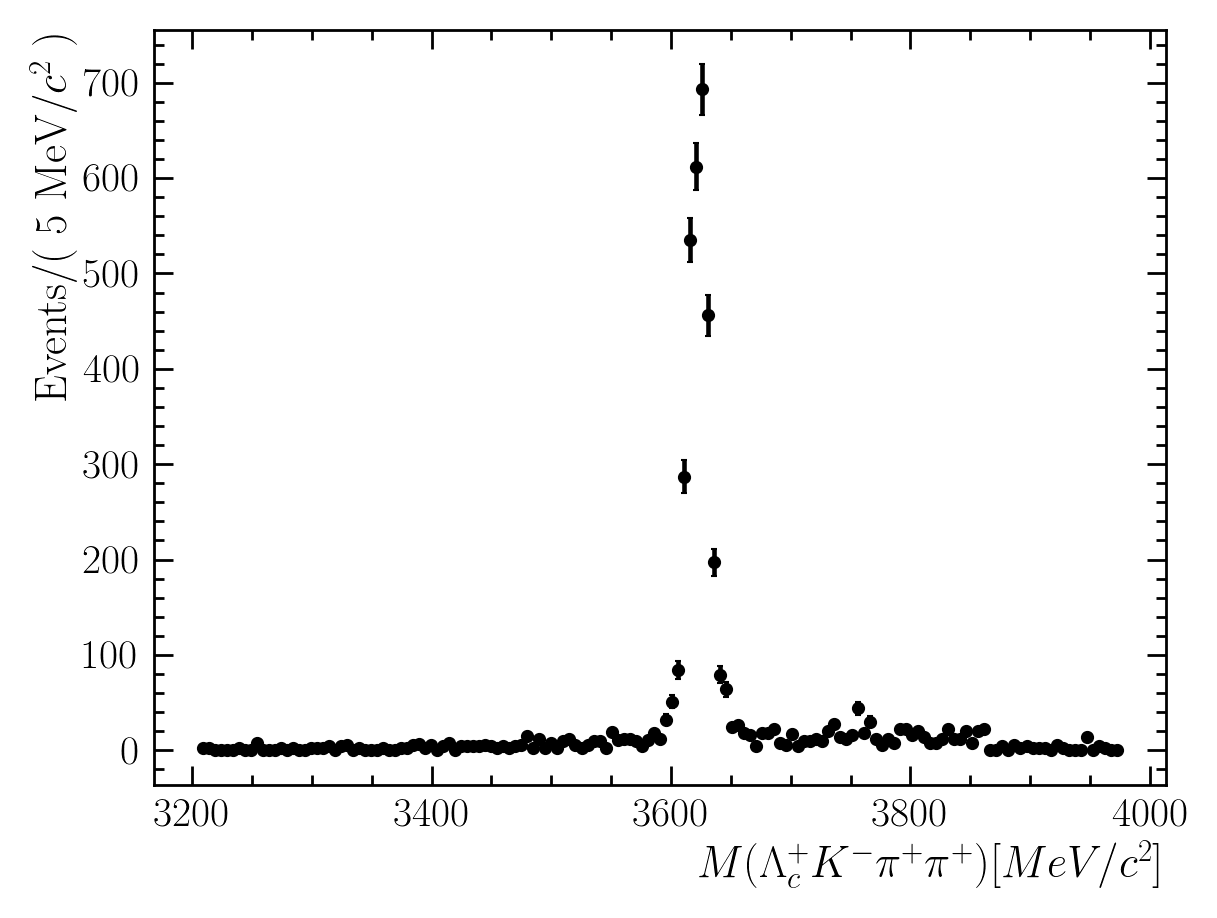

In [23]:
# visualise the data using a histogram:
fig, ax = plt.subplots()
# histogram with centered bins
histo = hist.Hist(hist.axis.Regular(obs_bin, obs_min, obs_max, label='Observable'))
histo.fill(data)
# errorbar histogram for the data
ax.errorbar(histo.axes.centers[0], histo.values(), xerr=histo.axes.widths[0]/2,
           yerr=np.sqrt(histo.values()), fmt='.', label='Data', color='black')
# labels
#ax.set_xlabel('$m_{cand}(\Xi_{cc}^{++})[MeV/c^2]$')
ax.set_xlabel('$M(\Lambda_c^+ K^- \pi^+ \pi^+)[MeV/c^2]$')
ax.set_ylabel(f'Events/( {obs_bin_width} MeV/$c^2$ )');

## Xicc Reconstruction plot

In [18]:
data = Xicc_M_before_cut

data_min = data.min()
data_max = data.max()

print(f'Min: {data_min:.3f} Max: {data_max:.3f}')
print(f'Number of events: {len(data)}')

obs_min = data_min
obs_max = data_max
obs_bin_width = 5
obs_bin = int((obs_max-obs_min)/obs_bin_width)

Min: 3173.460 Max: 4090.689
Number of events: 126738


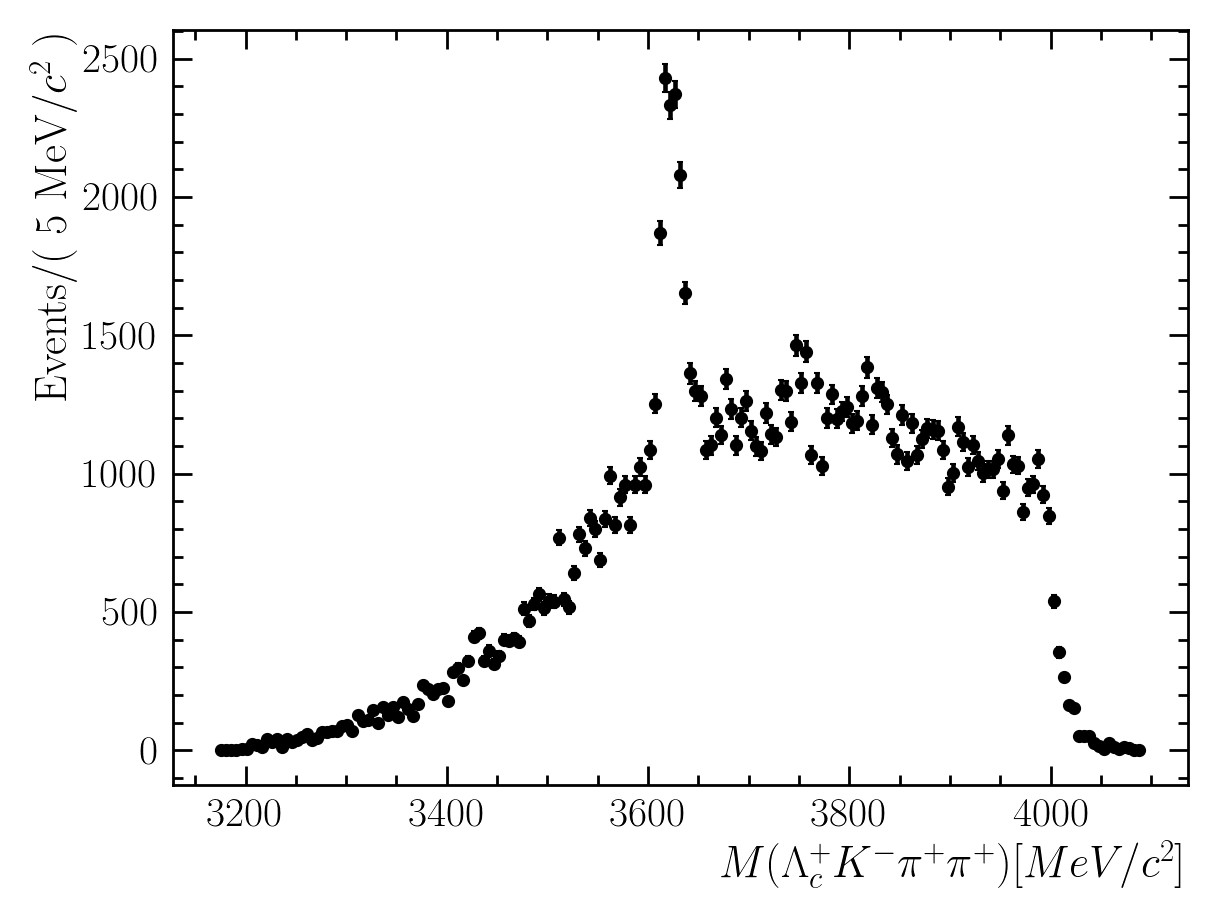

In [19]:
# visualise the data using a histogram:
fig, ax = plt.subplots()
# histogram with centered bins
histo = hist.Hist(hist.axis.Regular(obs_bin, obs_min, obs_max, label='Observable'))
histo.fill(data)
# errorbar histogram for the data
ax.errorbar(histo.axes.centers[0], histo.values(), xerr=histo.axes.widths[0]/2,
           yerr=np.sqrt(histo.values()), fmt='.', label='Data', color='black')
# labels
#ax.set_xlabel('$m_{cand}(\Xi_{cc}^{++})[MeV/c^2]$')
ax.set_xlabel('$M(\Lambda_c^+ K^- \pi^+ \pi^+)[MeV/c^2]$')
ax.set_ylabel(f'Events/( {obs_bin_width} MeV/$c^2$ )');

## Lc Turbo plot

In [20]:
data = data_lc_turbo

data_min = data.min()
data_max = data.max()

print(f'Min: {data_min:.3f} Max: {data_max:.3f}')
print(f'Number of events: {len(data)}')

obs_min = data_min
obs_max = data_max
obs_bin_width = 3
obs_bin = int((obs_max-obs_min)/obs_bin_width)

NameError: name 'data_lc_turbo' is not defined

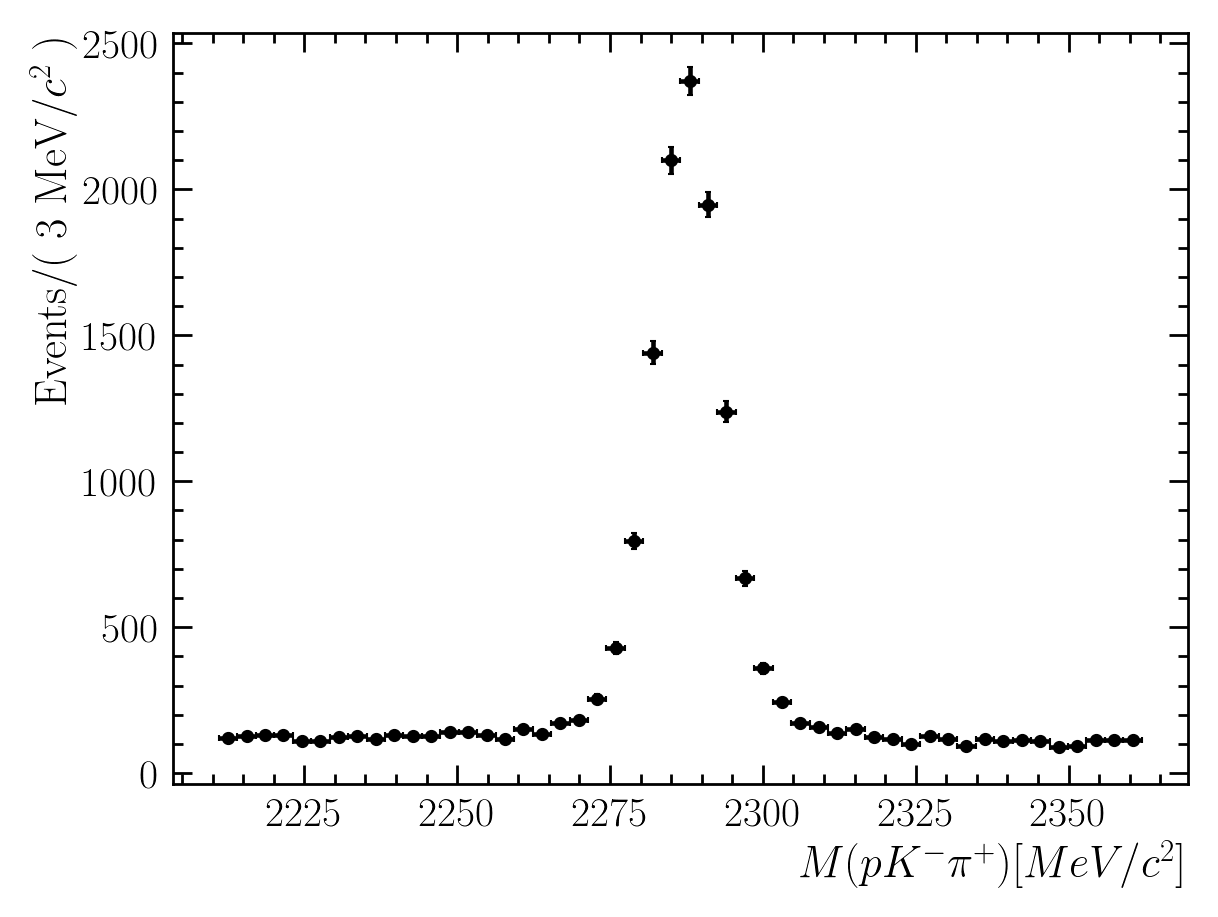

In [ ]:
# visualise the data using a histogram:
fig, ax = plt.subplots()
# histogram with centered bins
histo = hist.Hist(hist.axis.Regular(obs_bin, obs_min, obs_max, label='Observable'))
histo.fill(data)
# errorbar histogram for the data
ax.errorbar(histo.axes.centers[0], histo.values(), xerr=histo.axes.widths[0]/2,
           yerr=np.sqrt(histo.values()), fmt='.', label='Data', color='black')
# labels
#ax.set_xlabel('$m_{cand}(\Xi_{cc}^{++})[MeV/c^2]$')
ax.set_xlabel('$M(p K^- \pi^+)[MeV/c^2]$')
ax.set_ylabel(f'Events/( {obs_bin_width} MeV/$c^2$ )');